# **Face Mask Detection using Object Detection** 

---


## **1. Business Objectives**

COVID-19 has affected the whole world very badly. It has a huge impact on our everyday life, and this crisis is increasing day by day. In the near future, it seems difficult to eradicate this virus completely. To counter this virus, Face Masks have become an integral part of our lives. These Masks are capable of stopping the spread of this deadly virus, which will help to control the spread. As we have started moving forward in this ‘new normal’ world, the necessity of the face mask has increased.

We are going to build a model that will be able to classify whether the person is wearing a mask or not. This model can be used in crowded areas like Malls, Bus stands, and other public places.

## **2. Data Collection**

The dataset was obtained from Kaggle.

Link: https://www.kaggle.com/andrewmvd/face-mask-detection

With this dataset, it is possible to construct an object detection model to identify people wearing masks, not wearing them, or inappropriately wearing them. This dataset contains 853 images belonging to the 3 classes and their bounding boxes in the PASCAL VOC format. The classes are:
  - With mask
  - Without mask
  - Mask wore incorrectly.

In [ ]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Selecting the TensorFlow v1.x

%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import numpy as np
import six.moves.urllib as urllib
import sys
import tarfile
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

import cv2

# This is needed to display the images.
%matplotlib inline

In [ ]:
# Importing few libraries

import os
import datetime as dt
import tensorflow as tf
tf.__version__

'1.15.2'

## **3. Data Preparation**

Preparing the data to be used for training.

In [ ]:
# Path for the TFOD research folder

RESEARCH_DIR = "/content/drive/MyDrive/Colab Datasets/Face Mask Detection/models/research"

In [ ]:
# Changing the directory

os.chdir(RESEARCH_DIR)
os.getcwd()

'/content/drive/MyDrive/Colab Datasets/Face Mask Detection/models/research'

## **4. Model Building**

Trainng the TFOD Model based on Inception v2 based Faster RCNN.

In [ ]:
# Training the Inception v2 based Faster RCNN Model for 200K Steps

!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_coco.config

Streaming output truncated to the last 5000 lines.
INFO:tensorflow:global step 197510: loss = 0.1126 (0.178 sec/step)
I1208 06:03:39.433821 139899740452736 learning.py:507] global step 197510: loss = 0.1126 (0.178 sec/step)
INFO:tensorflow:global step 197511: loss = 0.0825 (0.179 sec/step)
I1208 06:03:39.614593 139899740452736 learning.py:507] global step 197511: loss = 0.0825 (0.179 sec/step)
INFO:tensorflow:global step 197512: loss = 0.0723 (0.172 sec/step)
I1208 06:03:39.787539 139899740452736 learning.py:507] global step 197512: loss = 0.0723 (0.172 sec/step)
INFO:tensorflow:global step 197513: loss = 0.0888 (0.163 sec/step)
I1208 06:03:39.952033 139899740452736 learning.py:507] global step 197513: loss = 0.0888 (0.163 sec/step)
INFO:tensorflow:global step 197514: loss = 0.2237 (0.185 sec/step)
I1208 06:03:40.138242 139899740452736 learning.py:507] global step 197514: loss = 0.2237 (0.185 sec/step)
INFO:tensorflow:global step 197515: loss = 0.4015 (0.175 sec/step)
I1208 06:03:40.31

In [ ]:
# Changing the directory

SAVE_DIR = "/content/drive/MyDrive/Colab Datasets/Face Mask Detection"

In [ ]:
# Since training is complete, creating the frozen inference graph (.pb file) is the last step. 
# The frozen_inference_graph.pb, is a frozen graph that cannot be trained anymore; it defines the graph_def and is a serialized graph

!python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/faster_rcnn_inception_v2_coco.config --trained_checkpoint_prefix training/model.ckpt-200000 --output_directory SAVE_DIR

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W1208 11:11:18.529864 140006610438016 module_wrapper.py:139] From export_inference_graph.py:133: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Instructions for updating:
Use `tf.cast` instead.
W1208 11:11:18.888488 140006610438016 deprecation.py:323] From /content/drive/My Drive/Colab Datasets/Face Mask Detection/models/research/object_detection/anchor_generators/grid_anchor_generator.py:59: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.

W1208 11:11:18.891693 140006610438016 module_wrapper

For the next step, we will copy these new weights that we obtained after training our model to our local disk where we have stored our tf1 folder.

The files that need to be copied to the tf1 folder can be found in the folder with name Final_Weights_Obtained.

In [ ]:
SAVE_DIR

'/content/drive/MyDrive/Colab Datasets/Face Mask Detection'

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Datasets/Face Mask Detection/models/research'

In [ ]:
RESEARCH_DIR

'/content/drive/MyDrive/Colab Datasets/Face Mask Detection/models/research'

In [ ]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = RESEARCH_DIR + "/save_model/frozen_inference_graph.pb"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = RESEARCH_DIR + "/training/labelmap.pbtxt"

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  RESEARCH_DIR + "/testing"

In [ ]:
import os
import glob

assert os.path.isfile(PATH_TO_CKPT)
assert os.path.isfile(PATH_TO_LABELS)

TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)

print(TEST_IMAGE_PATHS)

['/content/drive/MyDrive/Colab Datasets/Face Mask Detection/models/research/testing/maksssksksss845.png', '/content/drive/MyDrive/Colab Datasets/Face Mask Detection/models/research/testing/maksssksksss850.png']


In [ ]:
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)
NUM_CLASSES = 3

In [ ]:
# Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
    sess = tf.Session(graph=detection_graph)


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]

    return output_dict

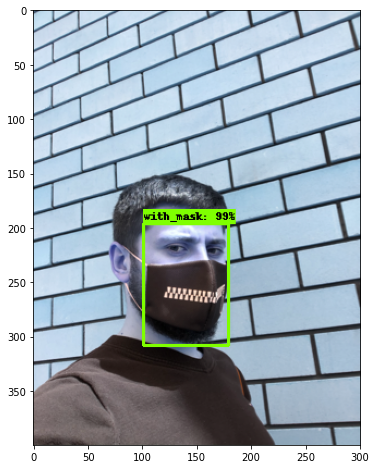

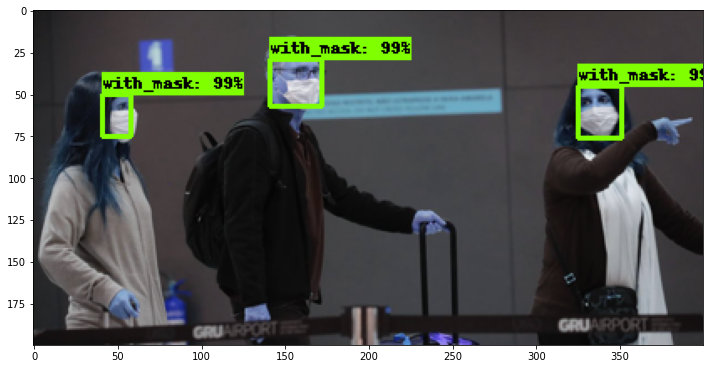

In [ ]:
## Plotting the test images along with their predicted classes and bounding boxes

for image_path in TEST_IMAGE_PATHS:
    
    # Input tensor is the image
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

    # Output tensors are the detection boxes, scores, and classes
    # Each box represents a part of the image where a particular object was detected
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

    # Each score represents level of confidence for each of the objects.
    # The score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

    # Number of objects detected
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')

    # Load image using OpenCV and
    # expand image dimensions to have shape: [1, None, None, 3]
    # i.e. a single-column array, where each item in the column has the pixel RGB value
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    # Perform the actual detection by running the model with the image as input
    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores, detection_classes, num_detections],
        feed_dict={image_tensor: image_expanded})

    # Draw the results of the detection (aka 'visulaize the results')

    vis_util.visualize_boxes_and_labels_on_image_array(
        image,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=3,
        min_score_thresh=0.75)

    # All the results have been drawn on image. Now display the image.
#    cv2.imshow('Object detector', image)

    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image)
    cv2.imwrite('output1.jpg', image)


In [ ]:
import time
from threading import Thread
import importlib.util

# Define the video stream

class VideoStream:
    def __init__(self, resolution=(640, 480), framerate=30):
        # Initialize the PiCamera and the camera image stream
        self.stream = cv2.VideoCapture(0)
        ret = self.stream.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter_fourcc(*'MJPG'))
        ret = self.stream.set(3, resolution[0])
        ret = self.stream.set(4, resolution[1])

        # Read first frame from the stream
        (self.grabbed, self.frame) = self.stream.read()

        # Variable to control when the camera is stopped
        self.stopped = False

    def start(self):
        # Start the thread that reads frames from the video stream
        Thread(target=self.update, args=()).start()
        return self

    def update(self):
        # Keep looping indefinitely until the thread is stopped
        while True:
            # If the camera is stopped, stop the thread
            if self.stopped:
                # Close camera resources
                self.stream.release()
                return

            # Otherwise, grab the next frame from the stream
            (self.grabbed, self.frame) = self.stream.read()

    def read(self):
        # Return the most recent frame
        return self.frame

    def stop(self):
        # Indicate that the camera and thread should be stopped
        self.stopped = True


cap = cv2.VideoCapture(0)  # Change only if you have more than one webcams

min_conf_threshold = float(0.95)
resW, resH = 1280, 720
imW, imH = int(resW), int(resH)
color_box = [(0, 255, 0), (0, 0, 255), (0, 255, 255)]

# Initialize frame rate calculation
frame_rate_calc = 1
freq = cv2.getTickFrequency()

# Initialize video stream
videostream = VideoStream(resolution=(imW, imH), framerate=30).start()
time.sleep(1)

# Detection
with detection_graph.as_default():
    with tf.compat.v1.Session(graph=detection_graph) as sess:
        while True:
            # Read frame from camera
            t1 = cv2.getTickCount()

            # Grab frame from video stream
            frame1 = videostream.read()

            # Acquire frame and resize to expected shape [1xHxWx3]
            frame = frame1.copy()
            #img = cv2.imread(frame1)
            #if img is None:
            #    break
            #frame = img.copy()
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_resized = cv2.resize(frame_rgb, (imW, imH))
            image_np_expanded = np.expand_dims(frame_resized, axis=0)

            # Extract image tensor
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Extract detection boxes
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Extract detection scores
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            # Extract detection classes
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            # Extract number of detectionsd
            num_detections = detection_graph.get_tensor_by_name(
                'num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})

            boxes = np.squeeze(boxes)
            classes = np.squeeze(classes).astype(np.int32)
            scores = np.squeeze(scores)

            for i in range(len(scores)):
                if ((scores[i] > min_conf_threshold) and (scores[i] <= 1.0)):
                    ymin = int(max(1, (boxes[i][0] * imH)))
                    xmin = int(max(1, (boxes[i][1] * imW)))
                    ymax = int(min(imH, (boxes[i][2] * imH)))
                    xmax = int(min(imW, (boxes[i][3] * imW)))
                    cl = int(classes[i])
                    cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), color_box[cl - 1], 2)

                    # Draw label
                    object_name = category_index[classes[i]]['name']
                    # labels[int(classes[i])] # Look up object name from "labels" array using class index
                    label = '%s: %d%%' % (object_name, int(scores[i] * 100))
                    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)  # Get font size
                    label_ymin = max(ymin, labelSize[1] + 10)  # Make sure not to draw label too close to top of window
                    cv2.rectangle(frame, (xmin, label_ymin - labelSize[1] - 10),
                                  (xmin + labelSize[0], label_ymin + baseLine - 10), (255, 255, 255),
                                  cv2.FILLED)  # Draw white box to put label text in
                    cv2.putText(frame, label, (xmin, label_ymin - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0),
                                2)  # Draw label text

                    # Draw framerate in corner of frame
                    cv2.putText(frame, 'FPS: {0:.2f}'.format(frame_rate_calc), (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1,
                                (255, 255, 0), 2, cv2.LINE_AA)

            # Display output
            cv2.imshow('Object detector - frozen_inference_graph.pb', frame)

            # Calculate framerate
            t2 = cv2.getTickCount()
            time1 = (t2 - t1) / freq
            frame_rate_calc = 1 / time1

            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break

AttributeError: ignored

## **5. Conclusions**

We have developed a model that can depict whether a person has worn a mask or not.

Future Scope:
  - We can use better SOTA models to increase the fps
  - We can use better computation capacity to train better models
  - We can use more data images and annotations